In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('credit_data.csv')
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


<AxesSubplot:xlabel='default', ylabel='count'>

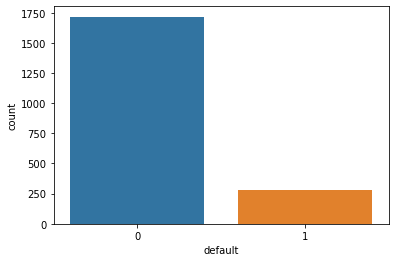

In [4]:
sns.countplot (x= df['default'])

In [5]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())

In [7]:
df.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [8]:
x_credit = df.iloc[:, 1:4].values
y_credit = df.iloc[:, 4].values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_credic = StandardScaler()
x_credit = scaler_credic.fit_transform(x_credit)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_credit_treinamento, x_credt_teste, y_credit_treinamento, y_credt_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [12]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [13]:
x_credt_teste.shape, y_credt_teste.shape

((500, 3), (500,))

In [23]:
from sklearn.svm import SVC
svm_credit = SVC(kernel = 'rbf', C = 2)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(C=2)

In [24]:
previsoes = svm_credit.predict(x_credt_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credt_teste, previsoes)

0.988

0.988

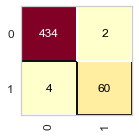

In [26]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credt_teste, y_credt_teste)